**TRABAJO PRACTICO FINAL: PANDAS**



1. Carga de Datos: Los estudiantes deben cargar el conjunto de datos en un DataFrame de pandas

In [435]:
# '!' sirve para usar comandos de terminal del sistema. wget es de linux, pero yo
#estoy corriendo en windows y me funciona, probé en la terminal y también.

! wget https://datos-abiertos.mingeneros.gob.ar/datos/linea144-2020.csv
! wget https://datos-abiertos.mingeneros.gob.ar/datos/linea144-2021.csv
! wget https://datos-abiertos.mingeneros.gob.ar/datos/linea144-enero-diciembre-2022.csv

--2024-12-16 04:21:32--  https://datos-abiertos.mingeneros.gob.ar/datos/linea144-2020.csv
Resolving datos-abiertos.mingeneros.gob.ar (datos-abiertos.mingeneros.gob.ar)... 181.209.30.253
Connecting to datos-abiertos.mingeneros.gob.ar (datos-abiertos.mingeneros.gob.ar)|181.209.30.253|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2763314 (2.6M) [application/octet-stream]
Saving to: ‘linea144-2020.csv’

linea144-2020.csv   100%[===================>]   2.63M  2.66MB/s    in 1.0s    

2024-12-16 04:21:34 (2.66 MB/s) - ‘linea144-2020.csv’ saved [2763314/2763314]

--2024-12-16 04:21:34--  https://datos-abiertos.mingeneros.gob.ar/datos/linea144-2021.csv
Resolving datos-abiertos.mingeneros.gob.ar (datos-abiertos.mingeneros.gob.ar)... 181.209.30.253
Connecting to datos-abiertos.mingeneros.gob.ar (datos-abiertos.mingeneros.gob.ar)|181.209.30.253|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2362447 (2.3M) [application/octet-stream]
Saving to:

In [436]:
#importo pandas y leo los archivos csv -- importo numpy que tal vez la necesite
#el encoding UTF-8 no creo que traiga problemas asique lo dejo así

import pandas as pd
import numpy as np

df1 = pd.read_csv('linea144-2020.csv')
df2 = pd.read_csv('linea144-2021.csv')
df3 = pd.read_csv('linea144-enero-diciembre-2022.csv')

2. Limpieza de Datos: Los estudiantes deben realizar una limpieza inicial de los datos, incluyendo un
análisis de valores faltantes y la identificación de posibles errores.

In [437]:
#vemos si hay columnas completamente vacías
print(df1.loc[:, df1.isna().all()])
print(df2.loc[:, df2.isna().all()])
print(df3.loc[:, df3.isna().all()])

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[29706 rows x 0 columns]
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[25301 rows x 0 columns]
       Unnamed: 19
0              NaN
1              NaN
2              NaN
3         

In [438]:
#hay una en el df3, entonces la elimino
df3 = df3.drop(columns=df3.loc[:, df3.isna().all()])

print(len(df1.columns), len(df2.columns), len(df3.columns))

df_concatenado = pd.concat([df1,df2,df3])
print(len(df_concatenado.columns))

19 19 19
20


In [439]:
#vemos que al concatenarlos hay una columna más, entonces se deduce que hay una con nombre distinto.
#veamos si es por un error ortográfico:
print(df_concatenado.columns)

Index(['fecha', 'prov_residencia_persona_en_situacion_violencia',
       'genero_persona_en_situacion_de_violencia',
       'edad_persona_en_situacion_de_violencia',
       'pais_nacimiento_persona_en_situacion_de_violencia',
       'tipo_de_violencia_fisica', 'tipo_de_violencia_psicologica',
       'tipo_de_violencia_sexual', 'tipo_de_violencia_economica_y_patrimonial',
       'tipo_de_violencia_simbolica', 'tipo_de_violencia_domestica',
       'modalidad_de_violencia_institucional',
       'modalidad_de_violencia_laboral',
       'modalidad_violencia_contra_libertad_reproductiva',
       'modalidad_de_violencia_obstetrica', 'modalidad_de_violencia_mediatica',
       'modalidad_de_violencia_otras', 'vinculo_con_la_persona_agresora',
       'genero_de_la_persona_agresora', 'Fecha'],
      dtype='object')


In [440]:
#Fecha está dos veces, una con mayúscula y otra con minúscula
#para evitar estos errores, pasamos a minúscula todas las columnas antes de concatenar
df1.columns = df1.columns.str.lower()
df2.columns = df2.columns.str.lower()
df3.columns = df3.columns.str.lower()

df_concatenado = pd.concat([df1,df2,df3])

print(len(df_concatenado.columns))
print(df_concatenado.columns)

19
Index(['fecha', 'prov_residencia_persona_en_situacion_violencia',
       'genero_persona_en_situacion_de_violencia',
       'edad_persona_en_situacion_de_violencia',
       'pais_nacimiento_persona_en_situacion_de_violencia',
       'tipo_de_violencia_fisica', 'tipo_de_violencia_psicologica',
       'tipo_de_violencia_sexual', 'tipo_de_violencia_economica_y_patrimonial',
       'tipo_de_violencia_simbolica', 'tipo_de_violencia_domestica',
       'modalidad_de_violencia_institucional',
       'modalidad_de_violencia_laboral',
       'modalidad_violencia_contra_libertad_reproductiva',
       'modalidad_de_violencia_obstetrica', 'modalidad_de_violencia_mediatica',
       'modalidad_de_violencia_otras', 'vinculo_con_la_persona_agresora',
       'genero_de_la_persona_agresora'],
      dtype='object')


In [441]:
#ahora sí, lo paso a csv para visualizar bien los datos y seguir adelante
df_concatenado.to_csv('Datos concatenados.csv')

In [442]:
filas_vacias = df_concatenado[df_concatenado.isnull().all(axis=1)]
print(len(filas_vacias))

0


In [443]:
#no hay filas completamente vacías

In [444]:
#al abrir el csv, ví algunos problemas, por ejemplo, 'Tierra del Fuego, Antártida ...' las comas son un problema,
#ya que al leer el archivo se separarán los datos como si fueran de distintas columnas.
df_concatenado[590:595]

,fecha,prov_residencia_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,tipo_de_violencia_fisica,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,tipo_de_violencia_simbolica,tipo_de_violencia_domestica,modalidad_de_violencia_institucional,modalidad_de_violencia_laboral,modalidad_violencia_contra_libertad_reproductiva,modalidad_de_violencia_obstetrica,modalidad_de_violencia_mediatica,modalidad_de_violencia_otras,vinculo_con_la_persona_agresora,genero_de_la_persona_agresora
590,2020-01-07,Buenos Aires,Mujer,28.0,Argentina,Si,Si,No,No,No,Si,No,No,No,No,No,No,Ex pareja,Varon
591,2020-01-07,Ciudad Autónoma de Buenos Aires,Mujer,34.0,NaN,No,Si,No,No,No,Si,No,No,No,No,No,No,Ex pareja,Varon
592,2020-01-07,Córdoba,Mujer,61.0,Argentina,Si,Si,No,Si,No,Si,No,No,No,No,No,No,Pareja,Varon
593,2020-01-07,Río Negro,Mujer,39.0,Argentina,No,Si,No,No,No,Si,No,No,No,No,No,No,Ex pareja,Varon
594,2020-01-07,"Tierra del Fuego, Antártida e Islas del Atlánt...",Mujer,25.0,Argentina,No,Si,Si,Si,No,Si,No,No,No,No,No,No,Pareja,Varon


In [445]:
#al leerlo con pandas no ocurre esa confusión, asique no dije nada (supongo que no es necesario preocuparse si pandas lo lee bien)

In [446]:
#ahora, voy a ver qué columnas tienen algún valor nulo, y ver qué hago al respecto

print(df_concatenado.isnull().any())


fecha                                                False
prov_residencia_persona_en_situacion_violencia        True
genero_persona_en_situacion_de_violencia              True
edad_persona_en_situacion_de_violencia                True
pais_nacimiento_persona_en_situacion_de_violencia     True
tipo_de_violencia_fisica                             False
tipo_de_violencia_psicologica                        False
tipo_de_violencia_sexual                             False
tipo_de_violencia_economica_y_patrimonial            False
tipo_de_violencia_simbolica                          False
tipo_de_violencia_domestica                          False
modalidad_de_violencia_institucional                 False
modalidad_de_violencia_laboral                       False
modalidad_violencia_contra_libertad_reproductiva     False
modalidad_de_violencia_obstetrica                    False
modalidad_de_violencia_mediatica                     False
modalidad_de_violencia_otras                         Fal

In [447]:
#entonces, la prov. de residencia, el género, la edad, el país de nacimiento, el vínculo con la persona agresora
#y género de la persona agresora tienen casos en que son nulos. Veamos qué hacemos

In [448]:
#EDAD:

#CÓDIGO NO USADO (más adelante se vé por qué)

#para la edad, rellenamos las edades nulas con el promedio de edad, que dentro de todo no modificará las estadísticas
'''promedio = df_concatenado['edad_persona_en_situacion_de_violencia'].mean()

df_concatenado['edad_persona_en_situacion_de_violencia'] = df_concatenado['edad_persona_en_situacion_de_violencia'].fillna(promedio)

print(df_concatenado['edad_persona_en_situacion_de_violencia'].head())'''


#ahora que no hay valores nulos, paso la edad a tipo entero
'''df_concatenado['edad_persona_en_situacion_de_violencia'] = df_concatenado['edad_persona_en_situacion_de_violencia'].astype('int32')
print(df_concatenado['edad_persona_en_situacion_de_violencia'].dtype)'''

"df_concatenado['edad_persona_en_situacion_de_violencia'] = df_concatenado['edad_persona_en_situacion_de_violencia'].astype('int32')\nprint(df_concatenado['edad_persona_en_situacion_de_violencia'].dtype)"

In [449]:
#para el resto de las columnas, considero que si relleno por algún dato en específico estaría modificando las estadísticas.
#por el momento voy a rellenarlas con 'no especificado', no sé si más adelante pueda ser conveniente dejarlas como nulas
df_concatenado['prov_residencia_persona_en_situacion_violencia'] = df_concatenado['prov_residencia_persona_en_situacion_violencia'].fillna('no especificado')

df_concatenado['genero_persona_en_situacion_de_violencia'] = df_concatenado['genero_persona_en_situacion_de_violencia'].fillna('no especificado')

df_concatenado['pais_nacimiento_persona_en_situacion_de_violencia'] = df_concatenado['pais_nacimiento_persona_en_situacion_de_violencia'].fillna('no especificado')

df_concatenado['vinculo_con_la_persona_agresora'] = df_concatenado['vinculo_con_la_persona_agresora'].fillna('no especificado')

df_concatenado['genero_de_la_persona_agresora'] = df_concatenado['genero_de_la_persona_agresora'].fillna('no especificado')

print(df_concatenado.isnull().any())

fecha                                                False
prov_residencia_persona_en_situacion_violencia       False
genero_persona_en_situacion_de_violencia             False
edad_persona_en_situacion_de_violencia                True
pais_nacimiento_persona_en_situacion_de_violencia    False
tipo_de_violencia_fisica                             False
tipo_de_violencia_psicologica                        False
tipo_de_violencia_sexual                             False
tipo_de_violencia_economica_y_patrimonial            False
tipo_de_violencia_simbolica                          False
tipo_de_violencia_domestica                          False
modalidad_de_violencia_institucional                 False
modalidad_de_violencia_laboral                       False
modalidad_violencia_contra_libertad_reproductiva     False
modalidad_de_violencia_obstetrica                    False
modalidad_de_violencia_mediatica                     False
modalidad_de_violencia_otras                         Fal

Ahora que están todos los datos completos, voy columna por columna haciendo algunos cambios que creo convenientes.

In [450]:
#fecha:
#intenté pasarla a tipo datetime, y luego eliminar la parte de hora con .dt.date,
#pero el tipo de dato volvía a ser object, asique no lo ví sentido que quede con horas, minutos y segundos en cero

In [451]:
#Provincia de residencia de la persona en situacion de violencia:

print(df_concatenado['prov_residencia_persona_en_situacion_violencia'].nunique())

#cuento la 'variedad' de provincias que hay

27


In [452]:
#no debe haber 27, sino 25 a lo sumo (recordemos que está 'no especificado')
#veamos donde están los errores

print(df_concatenado['prov_residencia_persona_en_situacion_violencia'].unique())

['Tucumán' 'Buenos Aires' 'Santiago Del Estero' 'Santa Fe' 'San Juan'
 'Catamarca' 'Neuquén' 'Mendoza' 'Córdoba' 'Río Negro'
 'Ciudad Autónoma de Buenos Aires' 'Salta' 'Entre Ríos' 'Jujuy' 'Chaco'
 'Chubut' 'San Luis' 'La Pampa' 'Misiones' 'Formosa'
 'Tierra del Fuego, Antártida e Islas del Atlántico Sur' 'no especificado'
 'Corrientes' 'Santa Cruz' 'La Rioja' 'Santiago del Estero' 'Cordoba']


In [453]:
#santiago del estero aparece dos veces, y cordoba también los problemas son las mayúsculas y las tildes,
#ya que no son relevantes, eliminemolas de toda la columna

df_concatenado['prov_residencia_persona_en_situacion_violencia'] = df_concatenado['prov_residencia_persona_en_situacion_violencia'].str.lower()

print(df_concatenado['prov_residencia_persona_en_situacion_violencia'].nunique())

df_concatenado['prov_residencia_persona_en_situacion_violencia'] = df_concatenado['prov_residencia_persona_en_situacion_violencia'].str.replace('ó', 'o')
#en este caso lo hice solo en la ó porque el problema era en córdoba

print(df_concatenado['prov_residencia_persona_en_situacion_violencia'].nunique())

26
25


In [454]:
df_concatenado['prov_residencia_persona_en_situacion_violencia'] = df_concatenado['prov_residencia_persona_en_situacion_violencia'].astype('category')

print(df_concatenado['prov_residencia_persona_en_situacion_violencia'].dtype)

#no sé si tiene sentido ponerle tipo categórico a las pcias., porque no tienen tan poca 'variedad'

category


In [455]:
#género de la persona en situacion de violencia:

print(df_concatenado['genero_persona_en_situacion_de_violencia'].unique())

['Mujer' 'no especificado' 'Varon' 'Mujer Trans' 'Transgenero' 'Otro'
 'Intersexual' 'Varón Trans' 'Travesti' 'Queer' 'Varon Trans'
 'Varon trans' 'No Binarie']


In [456]:
#bueno, al parecer ya existía el género 'otro' asíque los que había puesto 'no especificado' los cambiaré por 'otro'
#antes, paso todo a minúsculas y elimino tildes problemáticas

df_concatenado['genero_persona_en_situacion_de_violencia'] = df_concatenado['genero_persona_en_situacion_de_violencia'].str.lower()

print(df_concatenado['genero_persona_en_situacion_de_violencia'].unique())

df_concatenado['genero_persona_en_situacion_de_violencia'] = df_concatenado['genero_persona_en_situacion_de_violencia'].str.replace('ó', 'o')

print(df_concatenado['genero_persona_en_situacion_de_violencia'].unique())

['mujer' 'no especificado' 'varon' 'mujer trans' 'transgenero' 'otro'
 'intersexual' 'varón trans' 'travesti' 'queer' 'varon trans' 'no binarie']
['mujer' 'no especificado' 'varon' 'mujer trans' 'transgenero' 'otro'
 'intersexual' 'varon trans' 'travesti' 'queer' 'no binarie']


In [457]:
df_concatenado['genero_persona_en_situacion_de_violencia'] = df_concatenado['genero_persona_en_situacion_de_violencia'].str.replace('no especificado', 'otro')

print(df_concatenado['genero_persona_en_situacion_de_violencia'].unique())

['mujer' 'otro' 'varon' 'mujer trans' 'transgenero' 'intersexual'
 'varon trans' 'travesti' 'queer' 'no binarie']


In [458]:
#con edad no hay más cosas para hacer creo

#país de nacimiento de la persona en situacion de violencia:

print(df_concatenado['pais_nacimiento_persona_en_situacion_de_violencia'].unique())

['no especificado' 'Argentina' 'Paraguaya' 'Boliviana' 'Venezolana'
 'Dominicana' 'Peruana' 'Colombiana' 'Uruguaya' 'Brasileña' 'Chilena'
 'Otra' 'Ecuatoriana' 'Estadounidense' 'Cubana' 'Armenia' 'Japonesa'
 'Salvadoreña' 'Española' 'Mexicana' 'Alemana' 'Israelí' 'ARMENIA' 'Rusa'
 'Belga' 'Arabe' 'peruana' 'Vietnamita' 'Libano' 'Francesa' 'Ucraniana'
 'Griega' 'Australiana' 'Italiana' 'Nicaragüense' 'Panameña' 'Turca'
 'Costarricense' 'Guatemalteca' 'Otro' 'Palestina' 'ARABE' 'Canadiense'
 'Letona']


In [459]:
#los datos están ingresados como nacionalidades en lugar de países, pero no sé si cambiar el nombre de la columna
#a nacionalidad porque estaría 'mintiendo', ya que los datos se supone no son sobre la nacionalidad, sino sobre el país de origen (es similar pero no lo mismo)

df_concatenado['pais_nacimiento_persona_en_situacion_de_violencia'] = df_concatenado['pais_nacimiento_persona_en_situacion_de_violencia'].str.lower()

print(df_concatenado['pais_nacimiento_persona_en_situacion_de_violencia'].nunique())

df_concatenado['pais_nacimiento_persona_en_situacion_de_violencia'] = df_concatenado['pais_nacimiento_persona_en_situacion_de_violencia'].str.replace('no especificado', 'otro')

print(df_concatenado['pais_nacimiento_persona_en_situacion_de_violencia'].nunique())

df_concatenado['pais_nacimiento_persona_en_situacion_de_violencia'] = df_concatenado['pais_nacimiento_persona_en_situacion_de_violencia'].str.replace('otra', 'otro')

print(df_concatenado['pais_nacimiento_persona_en_situacion_de_violencia'].nunique())

41
40
39


In [460]:
#tipo_de_violencia_fisica:
print(df_concatenado['tipo_de_violencia_fisica'].unique())

['Si' 'No']


In [461]:
#perfecto, lo paso a categórico
df_concatenado['tipo_de_violencia_fisica'] = df_concatenado['tipo_de_violencia_fisica'].astype('category')

print(df_concatenado['tipo_de_violencia_fisica'].dtype)

category


In [462]:
#hago de a varios juntos
print(df_concatenado['tipo_de_violencia_psicologica'].unique(),
df_concatenado['tipo_de_violencia_sexual'].unique(),
df_concatenado['tipo_de_violencia_economica_y_patrimonial'].unique(),
df_concatenado['tipo_de_violencia_simbolica'].unique(),
df_concatenado['tipo_de_violencia_domestica'].unique())

['Si' 'No'] ['No' 'Si' 'SI'] ['No' 'Si'] ['No' 'Si' 'SI'] ['Si' 'No']


In [463]:
#donde había más de dos categorias corrijo
df_concatenado['tipo_de_violencia_sexual'] = df_concatenado['tipo_de_violencia_sexual'].str.replace('SI', 'Si')
df_concatenado['tipo_de_violencia_simbolica'] = df_concatenado['tipo_de_violencia_simbolica'].str.replace('SI', 'Si')

#reviso
print(df_concatenado['tipo_de_violencia_psicologica'].nunique(),
df_concatenado['tipo_de_violencia_sexual'].nunique(),
df_concatenado['tipo_de_violencia_economica_y_patrimonial'].nunique(),
df_concatenado['tipo_de_violencia_simbolica'].nunique(),
df_concatenado['tipo_de_violencia_domestica'].nunique())

2 2 2 2 2


In [464]:
#ahora los paso a categórico
df_concatenado['tipo_de_violencia_psicologica'] = df_concatenado['tipo_de_violencia_psicologica'].astype('category')
df_concatenado['tipo_de_violencia_sexual'] = df_concatenado['tipo_de_violencia_sexual'].astype('category')
df_concatenado['tipo_de_violencia_economica_y_patrimonial'] = df_concatenado['tipo_de_violencia_economica_y_patrimonial'].astype('category')
df_concatenado['tipo_de_violencia_simbolica'] = df_concatenado['tipo_de_violencia_simbolica'].astype('category')
df_concatenado['tipo_de_violencia_domestica'] = df_concatenado['tipo_de_violencia_domestica'].astype('category')

#reviso
print(df_concatenado['tipo_de_violencia_psicologica'].dtype,
df_concatenado['tipo_de_violencia_sexual'].dtype,
df_concatenado['tipo_de_violencia_economica_y_patrimonial'].dtype,
df_concatenado['tipo_de_violencia_simbolica'].dtype,
df_concatenado['tipo_de_violencia_domestica'].dtype)

category category category category category


In [465]:
#seguimos con modalidades de violencia
print(df_concatenado['modalidad_de_violencia_institucional'].unique(),
df_concatenado['modalidad_de_violencia_laboral'].unique(),
df_concatenado['modalidad_violencia_contra_libertad_reproductiva'].unique(),
df_concatenado['modalidad_de_violencia_obstetrica'].unique(),
df_concatenado['modalidad_de_violencia_mediatica'].unique(),
df_concatenado['modalidad_de_violencia_otras'].unique())

['No' 'Si' 'SI'] ['No' 'Si' 'SI'] ['No' 'Si' 'SI'] ['No' 'Si' 'SI'] ['No' 'Si'] ['No' 'Si']


In [466]:
#corrijo
df_concatenado['modalidad_de_violencia_institucional'] = df_concatenado['modalidad_de_violencia_institucional'].str.replace('SI', 'Si')
df_concatenado['modalidad_de_violencia_laboral'] = df_concatenado['modalidad_de_violencia_laboral'].str.replace('SI', 'Si')
df_concatenado['modalidad_violencia_contra_libertad_reproductiva'] = df_concatenado['modalidad_violencia_contra_libertad_reproductiva'].str.replace('SI', 'Si')
df_concatenado['modalidad_de_violencia_obstetrica'] = df_concatenado['modalidad_de_violencia_obstetrica'].str.replace('SI', 'Si')

#reviso
print(df_concatenado['modalidad_de_violencia_institucional'].nunique(),
df_concatenado['modalidad_de_violencia_laboral'].nunique(),
df_concatenado['modalidad_violencia_contra_libertad_reproductiva'].nunique(),
df_concatenado['modalidad_de_violencia_obstetrica'].nunique(),
df_concatenado['modalidad_de_violencia_mediatica'].nunique(),
df_concatenado['modalidad_de_violencia_otras'].nunique())

2 2 2 2 2 2


In [467]:
#perfecto, los cambio a categóricos
df_concatenado['modalidad_de_violencia_institucional'] = df_concatenado['modalidad_de_violencia_institucional'].astype('category')
df_concatenado['modalidad_de_violencia_laboral'] = df_concatenado['modalidad_de_violencia_laboral'].astype('category')
df_concatenado['modalidad_violencia_contra_libertad_reproductiva'] = df_concatenado['modalidad_violencia_contra_libertad_reproductiva'].astype('category')
df_concatenado['modalidad_de_violencia_obstetrica'] = df_concatenado['modalidad_de_violencia_obstetrica'].astype('category')
df_concatenado['modalidad_de_violencia_mediatica'] = df_concatenado['modalidad_de_violencia_mediatica'].astype('category')
df_concatenado['modalidad_de_violencia_otras'] = df_concatenado['modalidad_de_violencia_otras'].astype('category')

#reviso
print(df_concatenado['modalidad_de_violencia_institucional'].dtype,
df_concatenado['modalidad_de_violencia_laboral'].dtype,
df_concatenado['modalidad_violencia_contra_libertad_reproductiva'].dtype,
df_concatenado['modalidad_de_violencia_obstetrica'].dtype,
df_concatenado['modalidad_de_violencia_mediatica'].dtype,
df_concatenado['modalidad_de_violencia_otras'].dtype)

category category category category category category


In [468]:
print(df_concatenado['vinculo_con_la_persona_agresora'].unique())
print(df_concatenado['genero_de_la_persona_agresora'].unique())


['Pareja' 'Ex pareja' 'Otro familiar' 'Otro' 'Padre o tutor'
 'Superior jerarquico' 'no especificado' 'Madre o tutor']
['Varon' 'no especificado' 'Otro' 'Mujer' 'Varon Trans' 'Mujer Trans'
 'OTRO' 'Transgenero' 'Travesti' 'Queer' 'Varon trans']


In [469]:
df_concatenado['vinculo_con_la_persona_agresora'] = df_concatenado['vinculo_con_la_persona_agresora'].str.lower()
df_concatenado['genero_de_la_persona_agresora'] = df_concatenado['genero_de_la_persona_agresora'].str.lower()

print(df_concatenado['vinculo_con_la_persona_agresora'].unique())
print(df_concatenado['genero_de_la_persona_agresora'].unique())


['pareja' 'ex pareja' 'otro familiar' 'otro' 'padre o tutor'
 'superior jerarquico' 'no especificado' 'madre o tutor']
['varon' 'no especificado' 'otro' 'mujer' 'varon trans' 'mujer trans'
 'transgenero' 'travesti' 'queer']


In [470]:
#en caunto al vínculo 'otro familiar' no lo junto con 'otro', porque creo que no simbolizan lo mismo, y lo mismo con 'no especificado'
#igual que con no especificado, si lo cambio por otro tal vez estoy 'mintiendo' porque se trata de uno de lo

3. Análisis Descriptivo: Los estudiantes deben realizar un análisis descriptivo de los datos, calculando
estadísticas resumen (media, mediana, desviación estándar, etc.) para las variables relevantes. También
deben visualizar los datos utilizando boxplot. ¿Existen valores atípicos?

In [471]:
#fecha:

#no considero que haya algo relevante para calcular, más allá de lo que se verá en el ítem 4

<ipython-input-472-9b6627ac3d9e>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grafico_prov = df_aux.groupby('prov_residencia_persona_en_situacion_violencia').count()['id_denuncia'].plot.bar()


Text(0.5, 1.0, 'Cantidad de registros por provincia:')

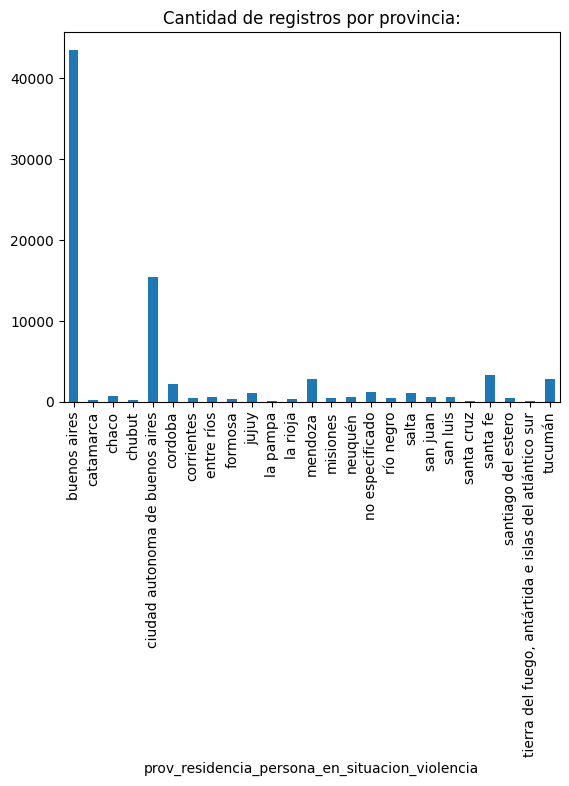

In [472]:
df_aux = pd.DataFrame(df_concatenado['prov_residencia_persona_en_situacion_violencia'])
df_aux.insert(0, 'id_denuncia', df_aux.index)
#necesito un df auxiliar, o por lo menos yo no encontré otra forma

grafico_prov = df_aux.groupby('prov_residencia_persona_en_situacion_violencia').count()['id_denuncia'].plot.bar()
grafico_prov.set_title('Cantidad de registros por provincia:')

#no usé boxplot porque no tenía mucho sentido a mi parecer

In [473]:
#genero_persona_en_situacion_de_violencia

df_concatenado['genero_persona_en_situacion_de_violencia'].describe()

,genero_persona_en_situacion_de_violencia
count,79565
unique,10
top,mujer
freq,77299


Text(0.5, 1.0, 'Cantidad de registros por género:')

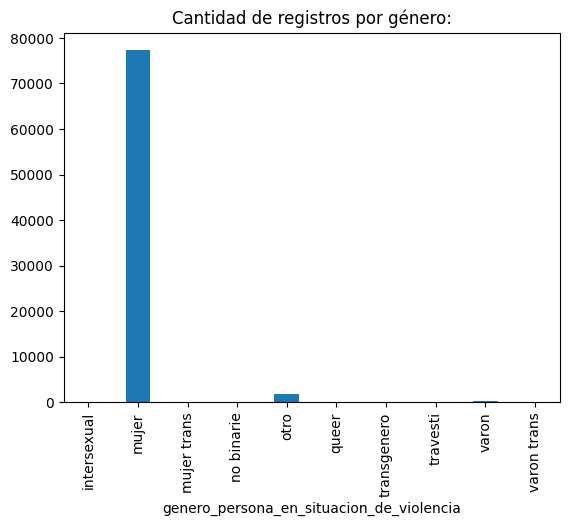

In [474]:
df_aux.insert(2, 'genero_persona_en_situacion_de_violencia', df_concatenado['genero_persona_en_situacion_de_violencia'])
grafico_genero = df_aux.groupby('genero_persona_en_situacion_de_violencia').count()['id_denuncia'].plot.bar()
grafico_genero.set_title('Cantidad de registros por género:')

#no tiene mucho sentido graficar, porque como vimos en las estadísticas, casi todos los datos son de un tipo,
#entonces en ningún tipo de gráfico logré que se vea bien la distribución

In [475]:
#edad_persona_en_situacion_de_violencia

df_concatenado['edad_persona_en_situacion_de_violencia'].describe().round()

,edad_persona_en_situacion_de_violencia
count,64107.0
mean,36.0
std,13.0
min,1.0
25%,27.0
50%,34.0
75%,42.0
max,127.0


In [477]:
#al parecer no estuvo bien rellenar los datos vacíos de la edad con el promedio,
#porque modificó las estadísticas, son todas muy parecidas    ---(CORREGIDO)

#la edad mínima es ¿1? supongo que puede tratarse de algún familiar que denuncia la violencia que sufre el niño, veamos:
df_concatenado[df_concatenado['edad_persona_en_situacion_de_violencia'] < 5]

,fecha,prov_residencia_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,tipo_de_violencia_fisica,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,tipo_de_violencia_simbolica,tipo_de_violencia_domestica,modalidad_de_violencia_institucional,modalidad_de_violencia_laboral,modalidad_violencia_contra_libertad_reproductiva,modalidad_de_violencia_obstetrica,modalidad_de_violencia_mediatica,modalidad_de_violencia_otras,vinculo_con_la_persona_agresora,genero_de_la_persona_agresora
3020,2020-02-08,buenos aires,mujer,3.0,otro,Si,Si,Si,No,No,No,No,No,No,No,No,No,otro,varon
8227,2020-04-12,tucumán,mujer,3.0,otro,Si,Si,No,No,No,Si,No,No,No,No,No,No,madre o tutor,mujer
10266,2020-05-03,ciudad autonoma de buenos aires,mujer,4.0,argentina,Si,Si,No,No,No,Si,No,No,No,No,No,No,pareja,varon
13822,2020-06-12,buenos aires,mujer,4.0,argentina,No,No,Si,No,No,Si,No,No,No,No,No,No,padre o tutor,varon
14247,2020-06-17,neuquén,mujer,1.0,argentina,No,No,Si,No,No,Si,No,No,No,No,No,No,padre o tutor,varon
14873,2020-06-25,ciudad autonoma de buenos aires,mujer,4.0,argentina,Si,Si,No,No,No,Si,No,No,No,No,No,No,padre o tutor,varon
16294,2020-07-12,buenos aires,mujer,4.0,argentina,Si,Si,Si,No,No,Si,No,No,No,No,No,No,padre o tutor,varon
22259,2020-09-23,jujuy,varon,3.0,argentina,No,No,Si,No,No,Si,No,No,No,No,No,No,otro,varon
25648,2020-11-07,buenos aires,mujer,4.0,otro,No,Si,No,Si,No,Si,No,No,No,No,No,No,ex pareja,varon
25951,2020-11-10,buenos aires,mujer,2.0,argentina,Si,Si,No,Si,Si,Si,No,No,No,No,No,No,pareja,varon


In [478]:
#sí, claramente son denuncias realizadas por familiares porque son muchas en las que sucede lo mismo

#y la edad máxima 127?? voy a reemplazarla por nula y volver a calcular las estadísticas
df_concatenado.loc[df_concatenado['edad_persona_en_situacion_de_violencia'] > 120, 'edad_persona_en_situacion_de_violencia'] = np.nan

#y calculo nuevamente las estadísticas
df_concatenado['edad_persona_en_situacion_de_violencia'].describe().round()

,edad_persona_en_situacion_de_violencia
count,64106.0
mean,36.0
std,13.0
min,1.0
25%,27.0
50%,34.0
75%,42.0
max,103.0


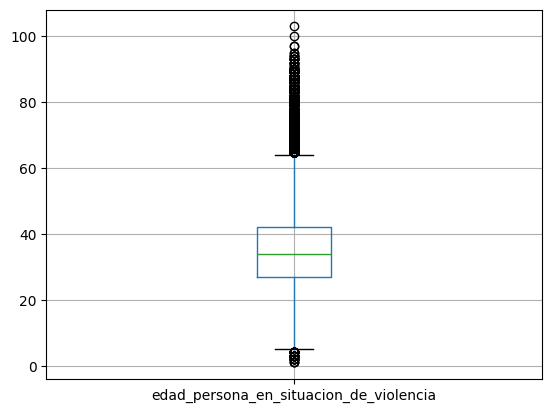

In [479]:
#ahora la edad máxima es 103. Me parece un poco extraño pero podría ser posible, no lo sé

#grafico
grafico_edad = df_concatenado.boxplot('edad_persona_en_situacion_de_violencia')

Text(0.5, 1.0, 'Cantidad de registros por país:')

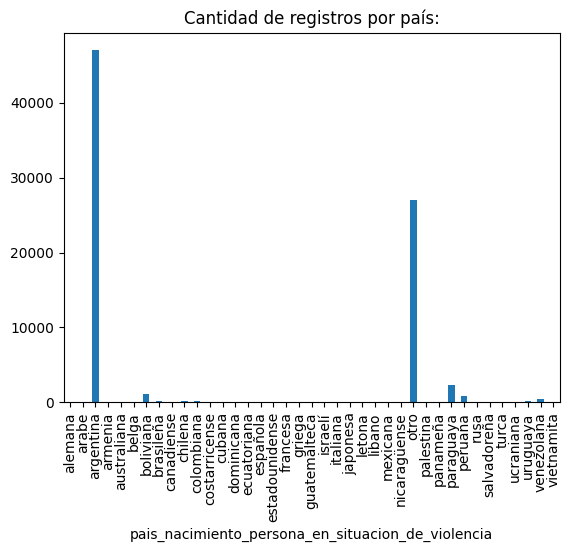

In [480]:
#pais_nacimiento_persona_en_situacion_de_violencia

df_aux.insert(3, 'pais_nacimiento_persona_en_situacion_de_violencia', df_concatenado['pais_nacimiento_persona_en_situacion_de_violencia'])
grafico_genero = df_aux.groupby('pais_nacimiento_persona_en_situacion_de_violencia').count()['id_denuncia'].plot.bar()
grafico_genero.set_title('Cantidad de registros por país:')

#tampoco tendrá nucho sentido, porque habrá países con muy pocos registros, pero por las dudas lo grafico igual

<ipython-input-481-295edd749100>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grafico_genero = df_aux.groupby('tipo_de_violencia_fisica').count()['id_denuncia'].plot.bar()


Text(0.5, 1.0, 'Tipo de violencia física:')

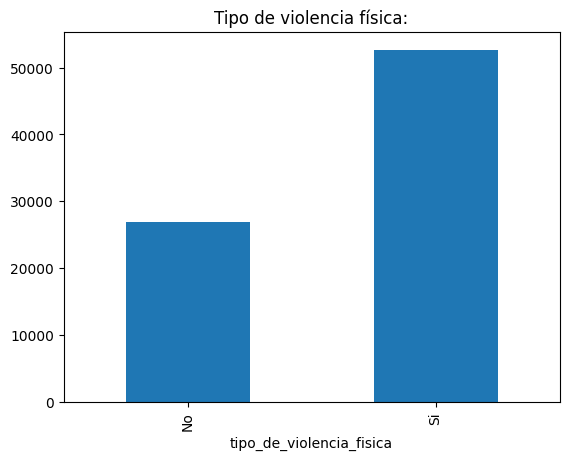

In [481]:
#tipo_de_violencia_fisica

#no uso describe porque no le veo mucho sentido

df_aux.insert(4, 'tipo_de_violencia_fisica', df_concatenado['tipo_de_violencia_fisica'])
grafico_genero = df_aux.groupby('tipo_de_violencia_fisica').count()['id_denuncia'].plot.bar()
grafico_genero.set_title('Tipo de violencia física:')

#el boxplot representaba peor la comparacion entre si y no

<ipython-input-482-fbcfa6761e57>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grafico_genero = df_aux.groupby('tipo_de_violencia_psicologica').count()['id_denuncia'].plot.bar()


Text(0.5, 1.0, 'Tipo de violencia psicológica:')

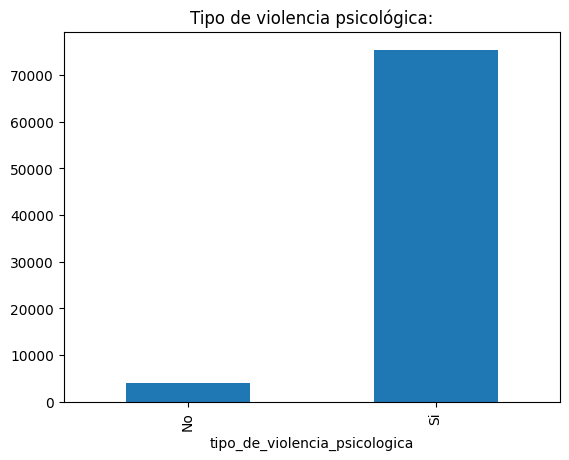

In [482]:
#tipo_de_violencia_psicologica

#no uso describe porque no le veo mucho sentido

df_aux.insert(5, 'tipo_de_violencia_psicologica', df_concatenado['tipo_de_violencia_psicologica'])
grafico_genero = df_aux.groupby('tipo_de_violencia_psicologica').count()['id_denuncia'].plot.bar()
grafico_genero.set_title('Tipo de violencia psicológica:')


<ipython-input-483-510c5b2437b5>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grafico_genero = df_aux.groupby('tipo_de_violencia_sexual').count()['id_denuncia'].plot.bar()


Text(0.5, 1.0, 'Tipo de violencia sexual:')

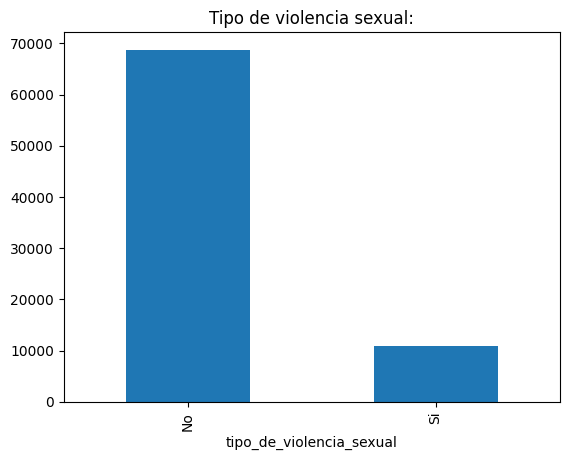

In [483]:
#tipo_de_violencia_sexual

#no uso describe porque no le veo mucho sentido

df_aux.insert(6, 'tipo_de_violencia_sexual', df_concatenado['tipo_de_violencia_sexual'])
grafico_genero = df_aux.groupby('tipo_de_violencia_sexual').count()['id_denuncia'].plot.bar()
grafico_genero.set_title('Tipo de violencia sexual:')

Text(0.5, 1.0, 'Vínculo con la persona agresora:')

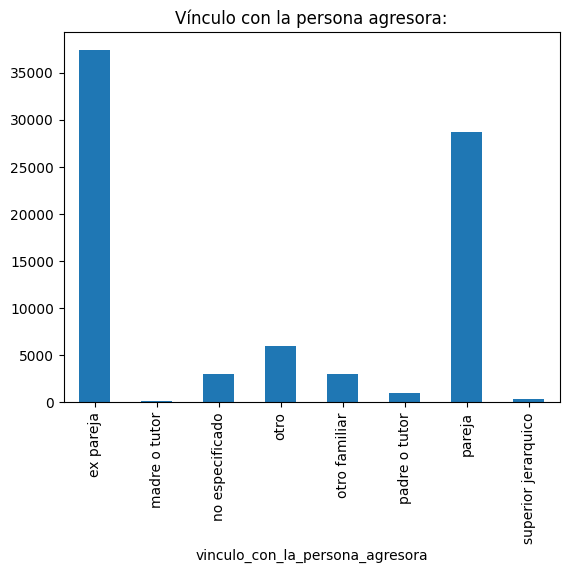

In [484]:
#vinculo_con_la_persona_agresora

df_aux.insert(7, 'vinculo_con_la_persona_agresora', df_concatenado['vinculo_con_la_persona_agresora'])
grafico_genero = df_aux.groupby('vinculo_con_la_persona_agresora').count()['id_denuncia'].plot.bar()
grafico_genero.set_title('Vínculo con la persona agresora:')

In [485]:
#descripcion:

df_concatenado['vinculo_con_la_persona_agresora'].describe()

,vinculo_con_la_persona_agresora
count,79565
unique,8
top,ex pareja
freq,37383


Text(0.5, 1.0, 'Género de la persona agresora:')

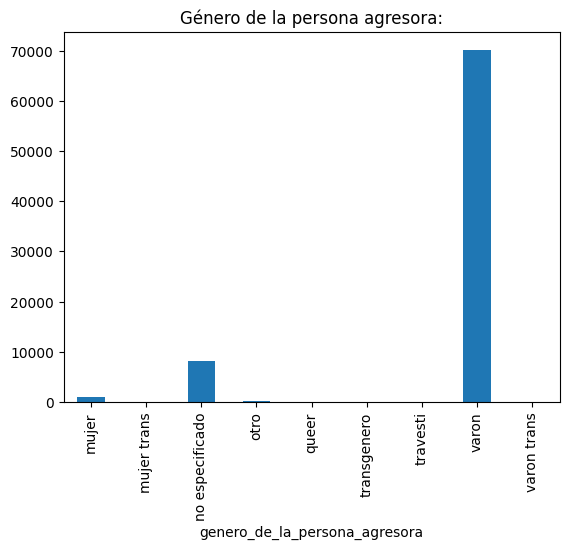

In [486]:
#genero_de_la_persona_agresora


df_aux.insert(7, 'genero_de_la_persona_agresora', df_concatenado['genero_de_la_persona_agresora'])
grafico_genero = df_aux.groupby('genero_de_la_persona_agresora').count()['id_denuncia'].plot.bar()
grafico_genero.set_title('Género de la persona agresora:')

In [487]:
#descripción:
df_concatenado['genero_de_la_persona_agresora'].describe()

,genero_de_la_persona_agresora
count,79565
unique,9
top,varon
freq,70152


4. Análisis Temporal: Los estudiantes deben realizar un análisis temporal de los datos, calculando la
evolución de las llamadas a lo largo del tiempo. ¿Hubo aumento de llamadas? ¿Hubo un cambio en las
edades de quienes denuncian?

<ipython-input-488-31e15a73f59b>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  por_mes = df_concatenado.resample('M', on='fecha').size()


"\ndf_concatenado.groupby('fecha').size()\n\nx = pd.to_datetime(df_concatenado['fecha']).dt.month\ndf_aux.insert(8, 'fechaXmes', x)\ndenuncias_pordia = df_aux.groupby(df_aux['fechaXmes'])['id_denuncia']\ndenuncias_pordia.plot.line()"

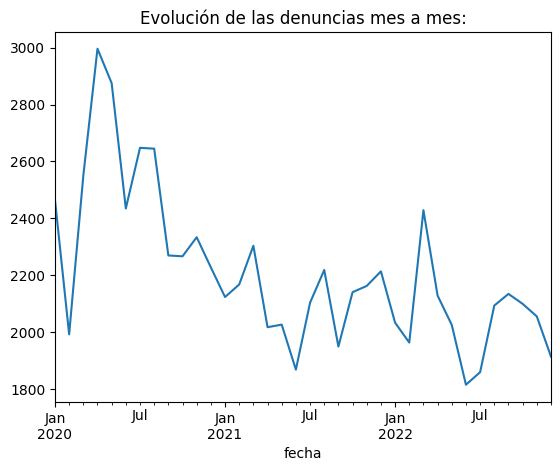

In [488]:
#cambio el tipo de dato de la columna fecha a datetime
#(no lo hice antes porque no me parecía necesario, y quedaban los segundos, algo sin mucho sentido)

df_concatenado['fecha'] = pd.to_datetime(df_concatenado['fecha'])
por_mes = df_concatenado.resample('M', on='fecha').size()

por_mes.plot.line(title='Evolución de las denuncias mes a mes:')

'''
df_concatenado.groupby('fecha').size()

x = pd.to_datetime(df_concatenado['fecha']).dt.month
df_aux.insert(8, 'fechaXmes', x)
denuncias_pordia = df_aux.groupby(df_aux['fechaXmes'])['id_denuncia']
denuncias_pordia.plot.line()'''


<ipython-input-489-c6d8c6284d9a>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  edad_por_mes = df_concatenado.resample('M', on='fecha')['edad_persona_en_situacion_de_violencia'].mean()


<Axes: title={'center': 'Promedio de edad de la víctima a través del tiempo:'}, xlabel='fecha'>

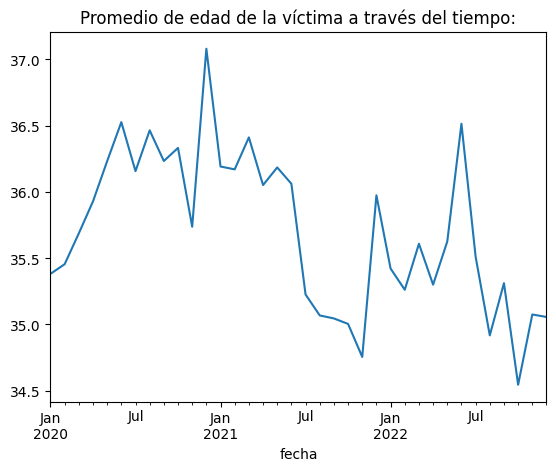

In [489]:
#ahora las modificaciones en la edad a través del tiempo

edad_por_mes = df_concatenado.resample('M', on='fecha')['edad_persona_en_situacion_de_violencia'].mean()
edad_por_mes.plot.line(title='Promedio de edad de la víctima a través del tiempo:')

5. Preguntas de Investigación: Plantear al menos tres preguntas de investigación relacionadas con los
datos y utilizar pandas para responderlas. Por ejemplo, ¿cuál fue la edad promedio de los denunciantes
de una provincia y un año específicos? ¿Cuál fue la provincia desde donde se realizaron más llamadas?

In [490]:
#1) ¿Qué porcentaje hay de casos de violencia psicológica, en relación a los casos de violencia física?

fisica = df_concatenado[df_concatenado['tipo_de_violencia_fisica'] == 'Si']
psicologica = fisica[fisica['tipo_de_violencia_psicologica'] == 'Si']

porcentaje = len(psicologica) / len(fisica) * 100
print('El porcentaje de casos de violencia física en los que también hay violencia psicológica es del: ', round(porcentaje), '%')

El porcentaje de casos de violencia física en los que también hay violencia psicológica es del:  97 %


In [491]:
#En casi todos los casos donde hay violencia física, también hay psicológica

In [492]:
#2) ¿Cúal es el promedio de edad de las víctimas cuyo vínculo con el agresor es padre/tutor o madre/tutor?

df_concatenado['vinculo_con_la_persona_agresora'].unique() #para ver bien como está escrito el vínculo

array(['pareja', 'ex pareja', 'otro familiar', 'otro', 'padre o tutor',
       'superior jerarquico', 'no especificado', 'madre o tutor'],
      dtype=object)

In [493]:
a = df_concatenado[df_concatenado['vinculo_con_la_persona_agresora'] == 'padre o tutor']['edad_persona_en_situacion_de_violencia'].mean()
b = df_concatenado[df_concatenado['vinculo_con_la_persona_agresora'] == 'madre o tutor']['edad_persona_en_situacion_de_violencia'].mean()
print('El promedio de edad de víctimas golpeadas por su padre, madre o tutor es de: ', round((a+b)/2, 2))

El promedio de edad de víctimas golpeadas por su padre, madre o tutor es de:  26.56


In [494]:
#3) ¿Cuáles son los tipos de violencia que más sufren los menores de 18 años?

menores = df_concatenado[df_concatenado['edad_persona_en_situacion_de_violencia'] < 18]

tipos_violencia = ['tipo_de_violencia_fisica', 'tipo_de_violencia_psicologica', 'tipo_de_violencia_sexual',
                   'tipo_de_violencia_economica_y_patrimonial', 'tipo_de_violencia_simbolica', 'tipo_de_violencia_domestica']

violencia_frecuente = menores[tipos_violencia].apply(lambda col: (col == 'Si').sum())

violencia_frecuente = violencia_frecuente.sort_values(ascending=False)

print('Los tipos de violencia más frecuentes en menores son: ')
print(violencia_frecuente)

Los tipos de violencia más frecuentes en menores son: 
tipo_de_violencia_psicologica                1082
tipo_de_violencia_domestica                   997
tipo_de_violencia_fisica                      801
tipo_de_violencia_sexual                      621
tipo_de_violencia_simbolica                   352
tipo_de_violencia_economica_y_patrimonial     131
dtype: int64


In [495]:
#4) ¿Cuáles son lo vínculos más frecuentes con el agresor?

vinculos_frecuencia = df_concatenado['vinculo_con_la_persona_agresora'].value_counts()

vinculo_mas_comun = vinculos_frecuencia.idxmax()
cantidad_vinculo_mas_comun = vinculos_frecuencia.max()

print("Los 5 vínculos más frecuentes:")
print(vinculos_frecuencia.head(5))

Los 5 vínculos más frecuentes:
vinculo_con_la_persona_agresora
ex pareja          37383
pareja             28731
otro                5992
otro familiar       2996
no especificado     2992
Name: count, dtype: int64


In [496]:
# 5) ¿Dejando de lado Argentina, cuáles son los países de nacimiento más comunes en cada modalidad de violencia?
#Así podríamos percibir, por ejemplo, ciertas situaciones laborales o institucionales hacia personas de ciertos países

#Filtro los datos excluyendo nacidos en Argentina
extranjeros = df_concatenado[df_concatenado['pais_nacimiento_persona_en_situacion_de_violencia'] != 'argentina']

modalidades_violencia = ['modalidad_de_violencia_institucional', 'modalidad_de_violencia_laboral',
    'modalidad_violencia_contra_libertad_reproductiva', 'modalidad_de_violencia_obstetrica',
    'modalidad_de_violencia_mediatica', 'modalidad_de_violencia_otras']

paises_por_modalidad = {}
for modalidad in modalidades_violencia:
    pais_mas_comun = extranjeros[extranjeros[modalidad] == 'Si']['pais_nacimiento_persona_en_situacion_de_violencia'].mode()
    paises_por_modalidad[modalidad] = pais_mas_comun.values


print('Países más comunes por modalidad de violencia (excluyendo Argentina): ')
for modalidad, pais in paises_por_modalidad.items():
    print(f"{modalidad}: {pais}")

#no encontré una forma que no sea usando el for

Países más comunes por modalidad de violencia (excluyendo Argentina): 
modalidad_de_violencia_institucional: ['otro']
modalidad_de_violencia_laboral: ['otro']
modalidad_violencia_contra_libertad_reproductiva: ['otro']
modalidad_de_violencia_obstetrica: ['otro']
modalidad_de_violencia_mediatica: ['otro']
modalidad_de_violencia_otras: ['otro']


In [497]:
#al ver los resultados, no tuvo mucho sentido hacer esta última pregunta, pero igual la dejo

In [498]:
#entre otras dudas, no sé si es correcto haber dejado la edad como float (no pareciera ser lo más lógico), pero si
#quería pasarla a int tenía que completar los valores nulos y no me parece del todo bien porque modifica un poco las estadísticas que luego se calculan